### IMPORTING THE LIBRARIES

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read the dataset and display the head. You will get the output as mentioned below

df = pd.read_csv(r'D:\Data science\Projects(WEB)\churn.csv')

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Check the shape of the dataframe
df.shape

(7043, 21)

In [5]:
# On the dataframe apply info() function and observe the Dtypes and Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Cleaning the Data

In [6]:
# Observe that all these Object columns have two values - Yes and No

df.loc[:, ['Partner', 'Dependents', 'PhoneService', \
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', \
            'TechSupport', 'StreamingTV', 'StreamingMovies',\
            'PaperlessBilling', 'Churn']]

,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,Yes,No,No,No,Yes,No,No,No,No,Yes,No
1,No,No,Yes,Yes,No,Yes,No,No,No,No,No
2,No,No,Yes,Yes,Yes,No,No,No,No,Yes,Yes
3,No,No,No,Yes,No,Yes,Yes,No,No,No,No
4,No,No,Yes,No,No,No,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No
7039,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No
7040,Yes,Yes,No,Yes,No,No,No,No,No,Yes,No
7041,Yes,No,Yes,No,No,No,No,No,No,Yes,Yes


In [7]:
# Converting all the Yes to 1 and No to 0

var = ['Partner', 'Dependents', 'PhoneService', 
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
       'TechSupport', 'StreamingTV', 'StreamingMovies', 
       'PaperlessBilling', 'Churn']

for feature in var:
    df[feature] = df[feature].apply(lambda x : 1 if x=='Yes' else 0)
    
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [8]:
# Now again having a look at all those columns to see if everything went well

df.loc[:, ['Partner', 'Dependents', 'PhoneService', \
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', \
            'TechSupport', 'StreamingTV', 'StreamingMovies',\
            'PaperlessBilling', 'Churn']]

,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn
0,1,0,0,0,1,0,0,0,0,1,0
1,0,0,1,1,0,1,0,0,0,0,0
2,0,0,1,1,1,0,0,0,0,1,1
3,0,0,0,1,0,1,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,1,1,1,1,0
7039,1,1,1,0,1,1,0,1,1,1,0
7040,1,1,0,1,0,0,0,0,0,1,0
7041,1,0,1,0,0,0,0,0,0,1,1


In [9]:
# Observe that all those columns are now converted from Object to Int64

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [10]:
# Checking all the Object Dtypes - Here, these columns have more than 2 categories

df.loc[:5, ['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', 'TotalCharges']]

,MultipleLines,InternetService,Contract,PaymentMethod,TotalCharges
0,No phone service,DSL,Month-to-month,Electronic check,29.85
1,No,DSL,One year,Mailed check,1889.5
2,No,DSL,Month-to-month,Mailed check,108.15
3,No phone service,DSL,One year,Bank transfer (automatic),1840.75
4,No,Fiber optic,Month-to-month,Electronic check,151.65
5,Yes,Fiber optic,Month-to-month,Electronic check,820.5


In [11]:
# You can also do this to separate Object columns

df.select_dtypes(include=['object'])

,customerID,gender,MultipleLines,InternetService,Contract,PaymentMethod,TotalCharges
0,7590-VHVEG,Female,No phone service,DSL,Month-to-month,Electronic check,29.85
1,5575-GNVDE,Male,No,DSL,One year,Mailed check,1889.5
2,3668-QPYBK,Male,No,DSL,Month-to-month,Mailed check,108.15
3,7795-CFOCW,Male,No phone service,DSL,One year,Bank transfer (automatic),1840.75
4,9237-HQITU,Female,No,Fiber optic,Month-to-month,Electronic check,151.65
...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,Yes,DSL,One year,Mailed check,1990.5
7039,2234-XADUH,Female,Yes,Fiber optic,One year,Credit card (automatic),7362.9
7040,4801-JZAZL,Female,No phone service,DSL,Month-to-month,Electronic check,346.45
7041,8361-LTMKD,Male,Yes,Fiber optic,Month-to-month,Mailed check,306.6


In [12]:
# Lets just try to see what is happening with TotalCharges. Check the output.

df['TotalCharges'].value_counts()

20.2      11
          11
19.75      9
20.05      8
19.9       8
          ..
5129.3     1
585.95     1
6137       1
412.1      1
5893.9     1
Name: TotalCharges, Length: 6531, dtype: int64

In [13]:
# Converting empty string in TotalCharges to NaN

df['TotalCharges'] = df['TotalCharges'].apply(lambda x : np.NaN if x==' ' else float(x))

In [14]:
# Observe the output, TotalCharges has 11 Missing values.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int64  


In [15]:
# Dropping customerID

df = df.drop('customerID', axis=1)

df.shape

(7043, 20)

In [16]:
# Getting all the Object Dtypes

df_categorical = df.select_dtypes(include=['object'])

df_categorical.head()

,gender,MultipleLines,InternetService,Contract,PaymentMethod
0,Female,No phone service,DSL,Month-to-month,Electronic check
1,Male,No,DSL,One year,Mailed check
2,Male,No,DSL,Month-to-month,Mailed check
3,Male,No phone service,DSL,One year,Bank transfer (automatic)
4,Female,No,Fiber optic,Month-to-month,Electronic check


In [17]:
# Encoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

df_encoded = pd.DataFrame(encoder.fit_transform(df_categorical), 
                      columns=encoder.get_feature_names(df_categorical.columns))

df_encoded.head()

,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
df.shape

(7043, 20)

In [19]:
df = pd.concat([df, df_encoded], axis=1)

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,1,0,No phone service,DSL,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Male,0,0,0,34,1,No,DSL,1,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,Male,0,0,0,2,1,No,DSL,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Male,0,0,0,45,0,No phone service,DSL,1,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Female,0,0,0,2,1,No,Fiber optic,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   object 
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   object 
 7   InternetService                        7043 non-null   object 
 8   OnlineSecurity                         7043 non-null   int64  
 9   OnlineBackup                           7043 non-null   int64  
 10  DeviceProtection                       7043 non-null   int64  
 11  Tech

In [21]:
df_categorical.columns

Index(['gender', 'MultipleLines', 'InternetService', 'Contract',
       'PaymentMethod'],
      dtype='object')

In [22]:
df = df.drop(df_categorical.columns, axis=1)

In [23]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,34,1,1,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,1,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,1,0,1,1,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,2,1,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   OnlineSecurity                         7043 non-null   int64  
 6   OnlineBackup                           7043 non-null   int64  
 7   DeviceProtection                       7043 non-null   int64  
 8   TechSupport                            7043 non-null   int64  
 9   StreamingTV                            7043 non-null   int64  
 10  StreamingMovies                        7043 non-null   int64  
 11  Pape

### Outliers

In [25]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'gender_Male',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [26]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,34,1,1,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,0,0,2,1,1,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,45,0,1,0,1,1,0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0,0,2,1,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [27]:
var = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[var].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
90%,69.000000,102.600000,5976.640000
95%,72.000000,107.400000,6923.590000
99%,72.000000,114.729000,8039.883000


### Missing Values

In [28]:
df.isnull().sum()

SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
OnlineSecurity                            0
OnlineBackup                              0
DeviceProtection                          0
TechSupport                               0
StreamingTV                               0
StreamingMovies                           0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
gender_Male                               0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (autom

In [29]:
df = df[~np.isnan(df['TotalCharges'])]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   Partner                                7032 non-null   int64  
 2   Dependents                             7032 non-null   int64  
 3   tenure                                 7032 non-null   int64  
 4   PhoneService                           7032 non-null   int64  
 5   OnlineSecurity                         7032 non-null   int64  
 6   OnlineBackup                           7032 non-null   int64  
 7   DeviceProtection                       7032 non-null   int64  
 8   TechSupport                            7032 non-null   int64  
 9   StreamingTV                            7032 non-null   int64  
 10  StreamingMovies                        7032 non-null   int64  
 11  Pape

In [31]:
sum(df['Churn'])/len(df['Churn'].index)*100

26.578498293515356

In [33]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

### UNDERSAMPLING

In [34]:
df1 = df.sample(frac=1)

churn_df = df.loc[df['Churn'] == 1]
non_churn_df = df.loc[df['Churn'] == 0][:1869]

normal_distributed_df = pd.concat([churn_df, non_churn_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4402,0,0,0,39,0,1,1,0,1,1,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2029,0,1,0,67,1,1,1,0,0,0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1338,0,0,0,1,1,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4230,0,0,0,11,1,1,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6290,0,1,0,71,1,0,0,0,0,1,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [35]:
new_df.shape

(3738, 25)

### STANDARDIZING THE DATA

In [36]:
from sklearn.preprocessing import StandardScaler
features = new_df.columns
standardized_data = StandardScaler().fit_transform(new_df)
print(standardized_data.shape)

(3738, 25)


In [37]:
print(standardized_data)

[[-0.49053436 -0.90009416 -0.60558039 ...  2.04911867 -0.83196659
  -0.5001672 ]
 [-0.49053436  1.11099488 -0.60558039 ...  2.04911867 -0.83196659
  -0.5001672 ]
 [-0.49053436 -0.90009416 -0.60558039 ... -0.48801468 -0.83196659
   1.99933144]
 ...
 [-0.49053436 -0.90009416 -0.60558039 ... -0.48801468  1.20197135
  -0.5001672 ]
 [-0.49053436  1.11099488  1.65130843 ...  2.04911867 -0.83196659
  -0.5001672 ]
 [-0.49053436  1.11099488  1.65130843 ... -0.48801468 -0.83196659
  -0.5001672 ]]


In [38]:
df1 = pd.DataFrame(standardized_data, columns = features)
df1.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.490534,-0.900094,-0.60558,0.463480,-3.197691,1.760308,1.452521,-0.702855,1.724056,1.220795,...,0.983023,3.197691,-0.889431,-1.049371,-0.445058,-0.452801,-0.459221,2.049119,-0.831967,-0.500167
1,-0.490534,1.110995,-0.60558,1.625333,0.312726,1.760308,1.452521,-0.702855,-0.580027,-0.819139,...,0.983023,-0.312726,-0.889431,0.952951,-0.445058,2.208474,-0.459221,2.049119,-0.831967,-0.500167
2,-0.490534,-0.900094,-0.60558,-1.113320,0.312726,-0.568082,-0.688458,-0.702855,-0.580027,-0.819139,...,0.983023,-0.312726,-0.889431,-1.049371,2.246896,-0.452801,-0.459221,-0.488015,-0.831967,1.999331
3,-0.490534,-0.900094,-0.60558,-0.698373,0.312726,1.760308,-0.688458,-0.702855,-0.580027,-0.819139,...,0.983023,-0.312726,-0.889431,0.952951,-0.445058,-0.452801,-0.459221,-0.488015,1.201971,-0.500167
4,-0.490534,1.110995,-0.60558,1.791312,0.312726,-0.568082,-0.688458,-0.702855,-0.580027,1.220795,...,-1.017271,-0.312726,1.124314,0.952951,-0.445058,-0.452801,2.177599,-0.488015,-0.831967,-0.500167


### SPLITTING THE DATA

In [39]:
y = df1.pop('Churn')
X = df1

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2990, 24) (2990,)
(748, 24) (748,)


In [41]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report

### LOGISTIC REGRESSION 

In [42]:
from sklearn.linear_model import LogisticRegression

In [44]:
tuned_parameters = [{'C':[0,1, 2, 3, 4, 5,6,7]}]

clf = RandomizedSearchCV(
    LogisticRegression(), tuned_parameters, scoring='accuracy'
)
clf.fit(X_train, y_train)

print("Best parameters set found on train set:")
print(clf.best_params_)
print(clf.best_estimator_)
print()

print(clf.score(X_test, y_test))


Best parameters set found on train set:
{'C': 5}
LogisticRegression(C=5)

0.7566844919786097


In [46]:
tuned_parameters = [{'C':[0,1, 2, 3, 4, 5,6,7,8]}]
Eval_metrics = ['accuracy', 'precision','recall']
for i in Eval_metrics:

    clf =RandomizedSearchCV (
       LogisticRegression(), tuned_parameters, scoring='{}'.format(i)
    )
    clf.fit(X_train, y_train)
    print('for {}'.format(i))

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()

    print(clf.score(X_test, y_test))


for accuracy
Best parameters set found on train set:
{'C': 5}
LogisticRegression(C=5)

0.7566844919786097
for precision
Best parameters set found on train set:
{'C': 1}
LogisticRegression(C=1)

0.7659033078880407
for recall
Best parameters set found on train set:
{'C': 6}
LogisticRegression(C=6)

0.7712082262210797


**Considering C=6 with which recall is 77%**

In [47]:
classifier = LogisticRegression(C=6, penalty='l2')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [48]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.7566844919786097

In [49]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[266,  93],
       [ 89, 300]], dtype=int64)

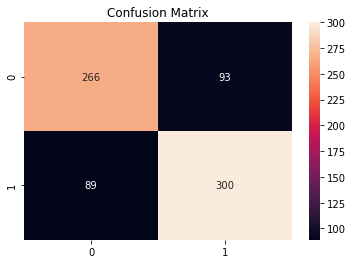

In [50]:
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [51]:
metrics.f1_score(y_test, y_pred)

0.7672634271099744

In [52]:
metrics.roc_auc_score(y_test, y_pred)

0.7560776507149967

In [53]:
metrics.precision_score(y_test, y_pred)

0.7633587786259542

In [81]:
metrics.recall_score(y_test, y_pred)

0.7763496143958869

In [54]:
metrics.accuracy_score(y_test, y_pred)

0.7566844919786097

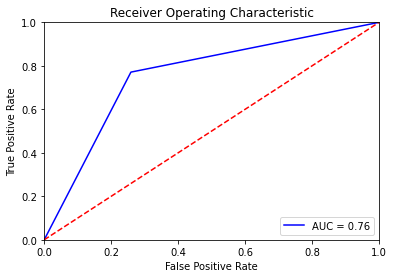

In [55]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### DECISION TREE

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
tuned_parameters = [{'max_depth':[2,3,4,5,6,7,8]}]
Eval_metrics = ['accuracy', 'precision','recall']
for i in Eval_metrics:

    clf =RandomizedSearchCV (
       DecisionTreeClassifier(), tuned_parameters, scoring='{}'.format(i)
    )
    clf.fit(X_train, y_train)
    print('for {}'.format(i))

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()

    print(clf.score(X_test, y_test))


for accuracy
Best parameters set found on train set:
{'max_depth': 4}
DecisionTreeClassifier(max_depth=4)

0.7553475935828877
for precision
Best parameters set found on train set:
{'max_depth': 4}
DecisionTreeClassifier(max_depth=4)

0.782967032967033
for recall
Best parameters set found on train set:
{'max_depth': 3}
DecisionTreeClassifier(max_depth=3)

0.8637532133676092


In [53]:
classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [54]:
y_test_pred = classifier.predict(X_test)

In [55]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[266,  93],
       [ 89, 300]], dtype=int64)

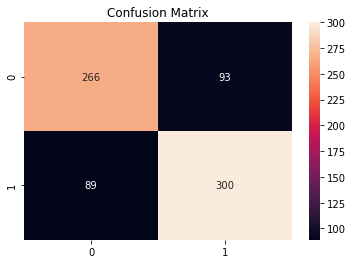

In [56]:
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [64]:
metrics.accuracy_score(y_test, y_pred)

0.7566844919786097

In [65]:
metrics.roc_auc_score(y_test, y_pred)

0.7560776507149967

In [66]:
metrics.precision_score(y_test, y_pred)

0.7633587786259542

In [67]:
metrics.f1_score(y_test, y_pred)

0.7672634271099744

In [80]:
metrics.recall_score(y_test, y_pred)

0.7763496143958869

### RANDOM FOREST

In [57]:
from sklearn.ensemble import RandomForestClassifier 

In [58]:
tuned_parameters = [{'n_estimators':[10,20,30,40,50,60,70,80,90,100],'max_depth':[2,3,4,5,6,7,8]}]
Eval_metrics = ['accuracy', 'precision','recall']
for i in Eval_metrics:

    clf =RandomizedSearchCV (
       RandomForestClassifier(), tuned_parameters, scoring='{}'.format(i)
    )
    clf.fit(X_train, y_train)
    print('for {}'.format(i))

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()

    print(clf.score(X_test, y_test))

for accuracy
Best parameters set found on train set:
{'n_estimators': 50, 'max_depth': 7}
RandomForestClassifier(max_depth=7, n_estimators=50)

0.7580213903743316
for precision
Best parameters set found on train set:
{'n_estimators': 70, 'max_depth': 5}
RandomForestClassifier(max_depth=5, n_estimators=70)

0.7659033078880407
for recall
Best parameters set found on train set:
{'n_estimators': 20, 'max_depth': 3}
RandomForestClassifier(max_depth=3, n_estimators=20)

0.7737789203084833


In [59]:
classifier = RandomForestClassifier(n_estimators=70, random_state=0, max_depth=8)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [72]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[264,  95],
       [ 87, 302]], dtype=int64)

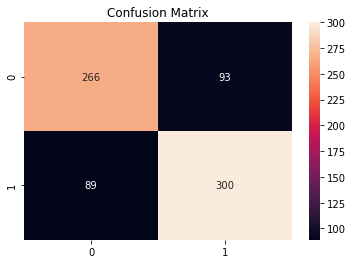

In [60]:
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [73]:
metrics.accuracy_score(y_test, y_pred)

0.7566844919786097

In [74]:
metrics.precision_score(y_test, y_pred)

0.760705289672544

In [75]:
metrics.roc_auc_score(y_test, y_pred)

0.755862829482066

In [76]:
metrics.f1_score(y_test, y_pred)

0.7684478371501272

In [79]:
metrics.recall_score(y_test, y_pred)

0.7763496143958869

### SVM

In [84]:
from sklearn.svm import SVC

In [85]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': np.random.rand(3) , 'C': [1, 10, 100]},
                    {'kernel': ['linear'], 'C': [1, 10, 100]}]

Eval_metrics = ['accuracy', 'precision','recall']
for i in Eval_metrics:

    clf = RandomizedSearchCV(
        SVC(), tuned_parameters, scoring='{}'.format(i)
    )
    clf.fit(X_train, y_train)
    print('for {}'.format(i))
    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()

    print(clf.score(X_test, y_test))

for accuracy
Best parameters set found on train set:
{'kernel': 'linear', 'C': 10}
SVC(C=10, kernel='linear')

0.7459893048128342
for precision
Best parameters set found on train set:
{'kernel': 'rbf', 'gamma': 0.9332355271396171, 'C': 1}
SVC(C=1, gamma=0.9332355271396171)

0.793939393939394
for recall
Best parameters set found on train set:
{'kernel': 'linear', 'C': 1}
SVC(C=1, kernel='linear')

0.8046272493573264


In [88]:
classifier = SVC(kernel='linear', C=1)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [89]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[245, 114],
       [ 76, 313]], dtype=int64)

In [90]:
metrics.accuracy_score(y_test, y_pred)

0.7459893048128342

In [91]:
metrics.precision_score(y_test, y_pred)

0.7330210772833724

In [92]:
metrics.roc_auc_score(y_test, y_pred)

0.7435392514196103

In [93]:
metrics.f1_score(y_test, y_pred)

0.767156862745098

In [94]:
metrics.recall_score(y_test, y_pred)

0.8046272493573264

### KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
tuned_parameters = [{'n_neighbors':[1, 2, 3, 4, 5], 'p':[1, 2, 3]}]
Eval_metrics = ['accuracy', 'precision','recall']
for i in Eval_metrics:
    clf = RandomizedSearchCV(
        KNeighborsClassifier(), tuned_parameters, scoring='{}'.format(i)
    )
    clf.fit(X_train, y_train)
    print('for {}'.format(i))

    print("Best parameters set found on train set:")
    print(clf.best_params_)
    print(clf.best_estimator_)
    print()

    print(clf.score(X_test, y_test))

for accuracy
Best parameters set found on train set:
{'p': 2, 'n_neighbors': 5}
KNeighborsClassifier()

0.7366310160427807
for precision
Best parameters set found on train set:
{'p': 2, 'n_neighbors': 2}
KNeighborsClassifier(n_neighbors=2)

0.758893280632411
for recall
Best parameters set found on train set:
{'p': 1, 'n_neighbors': 5}
KNeighborsClassifier(p=1)

0.781491002570694


In [63]:
classifier = KNeighborsClassifier(n_neighbors=5,p=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [64]:
con_metric = metrics.confusion_matrix(y_test, y_pred)
con_metric

array([[244, 115],
       [ 85, 304]], dtype=int64)

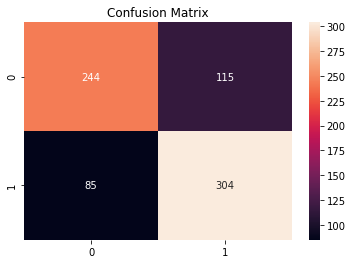

In [65]:
sns.heatmap(con_metric, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [48]:
metrics.accuracy_score(y_test, y_pred)

0.732620320855615

In [49]:
metrics.precision_score(y_test, y_pred)

0.7255369928400954

In [50]:
metrics.roc_auc_score(y_test, y_pred)

0.7305783703661269

In [51]:
metrics.f1_score(y_test, y_pred)

0.7524752475247525

In [52]:
metrics.recall_score(y_test, y_pred)

0.781491002570694

## Observe that 26.5% datapoints belong to one class rest all belongs to other class. Clearly dataset is having high imbalance.

**To Do:**
1. Read about Oversampling and Undersampling.
2. Perform undersampling.

## Train Test Split

**To Do:**
1. Sandardise the data
2. Perform 80-20 split

## Model Building - Logistic Regression

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance

## Model Building - SVM, KNN, DT, RF, etc

For all the algorithms mentioned above, perform below mentioned steps.

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance